In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

%precision 3
np.random.seed(1111)

In [64]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = np.array(df['score'])
mean = np.mean(scores)
var = np.var(scores)
mean, var

(69.53, 206.6691)

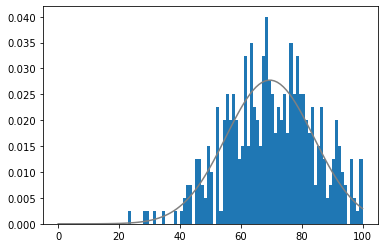

In [65]:
xs = np.arange(101)
rv = stats.norm(mean, np.sqrt(var))
plt.plot(xs, rv.pdf(xs), color='gray')
plt.hist(scores, bins=100, range=(0,100), density=True)
plt.show()

In [66]:
sam = 10000
n = 20
samples = np.random.choice(scores, (sam, n))
samples[:5]

array([[87, 64, 76, 89, 50, 67, 86, 62, 77, 99, 83, 64, 61, 64, 93, 61,
        89, 78, 56, 45],
       [72, 34, 74, 63, 65, 74, 85, 69, 59, 92, 52, 73, 79, 46, 65, 83,
        61, 61, 58, 64],
       [68, 76, 29, 68, 79, 57, 77, 90, 79, 85, 59, 68, 93, 68, 56, 86,
        72, 52, 84, 41],
       [77, 63, 61, 84, 92, 79, 91, 49, 83, 60, 63, 65, 70, 93, 63, 63,
        61, 87, 74, 59],
       [60, 93, 80, 89, 90, 62, 23, 29, 63, 82, 89, 68, 59, 86, 80, 54,
        46, 73, 67, 69]], dtype=int64)

In [67]:
rv = stats.norm()
rv.isf(0.025)

1.9599639845400545

In [68]:
rv.isf(0.975)

-1.959963984540054

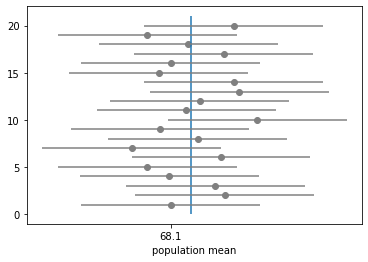

In [69]:
# 모분산을 아는 경우 95% 신뢰구간 : 정규분포 이용
rv = stats.norm()
n_samples = 20
n = 20
plt.vlines(mean, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    mean = np.mean(sample_)
    lcl = mean - rv.isf(0.025) * np.sqrt(var/n)
    ucl = mean + rv.isf(0.025) * np.sqrt(var/n)
#   ucl = mean - rv.isf(0.975) * np.sqrt(var/n)
    if lcl <= mean <= ucl:
        plt.scatter(mean, n_samples-i, color='gray')
        plt.hlines(n_samples-i, lcl, ucl, color='gray')
    else:
        plt.scatter(mean, n_samples-i, color='b')
        plt.hlines(n_samples-i, lcl, ucl, color='b')

plt.xticks([mean])
plt.xlabel('population mean')
plt.show()

In [10]:
df = pd.read_csv('./data/ch11_potato.csv')
sample = np.array(df['무게'])
sample

array([122.02, 131.73, 130.6 , 131.82, 132.05, 126.12, 124.43, 132.89,
       122.79, 129.95, 126.14, 134.45, 127.64, 125.68])

In [11]:
mean = np.mean(sample)
mean

128.4507142857143

In [13]:
var = np.var(sample)
var

14.735449489795883

In [14]:
# 모분산 = 9
rv = stats.norm(130, np.sqrt(9/var))
rv.isf(0.95)

128.7145155797663

In [17]:
# 검정 통계량 Z
Z = (mean - 130) / np.sqrt(9/14)
Z

-1.932298779026813

In [25]:
rv.cdf(Z)

0.026661319523126635

In [18]:
rv = stats.norm()
rv.isf(0.95)

-1.6448536269514722

In [19]:
rv.interval(0.95)

(-1.959963984540054, 1.959963984540054)

In [24]:
# 양측 검정의 p값
rv.cdf(Z)*2

0.05332263904625327

In [26]:
# 모분산을 아는 경우 모평균에 대한 양측검정
# 정규분포
def pmean_test(sample, mean0, p_var, alpha=0.05):
    s_mean = np.mean(sample)
    n = len(sample)
    rv = stats.norm()
    interval = rv.interval(1-alpha)

    z = (s_mean - mean0) / np.sqrt(p_var/n)
    if interval[0] <= z <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if z < 0:
        p = rv.cdf(z) * 2
    else:
        p = (1 - rv.cdf(z)) * 2
    print(f'p값은 {p:.3f}')

In [27]:
def pmean_test(sample, mean0, alpha=0.05):
    s_mean = np.mean(sample)
    u_var = np.var(sample, ddof=1)
    n = len(sample)
    rv = stats.t(df=n-1)
    interval = rv.interval(1-alpha)

    t = (s_mean - mean0) / np.sqrt(u_var/n)
    if interval[0] <= t <= interval[1]:
        print('귀무가설을 채택')
    else:
        print('귀무가설을 기각')

    if t < 0:
        p = rv.cdf(t) * 2
    else:
        p = (1 - rv.cdf(t)) * 2
    print(f'p값은 {p:.3f}')

In [28]:
pmean_test(sample, 130)

귀무가설을 채택
p값은 0.169


In [29]:
t, p = stats.ttest_1samp(sample, 130)
t, p

(-1.4551960206404198, 0.16933464230414275)

In [31]:
data = pd.read_csv('./data/ch11_training_rel.csv')

In [32]:
data.describe()

,전,후
count,20.000000,20.000000
mean,52.850000,58.250000
std,4.295346,11.964311
min,45.000000,37.000000
25%,50.500000,51.750000
50%,52.000000,58.500000
75%,55.500000,65.750000
max,61.000000,84.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x26174160070>,
 'caps': [<matplotlib.lines.Line2D at 0x26174160790>,
 'boxes': [<matplotlib.lines.Line2D at 0x26174155ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x26174160eb0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2617416d280>,
 'means': []}

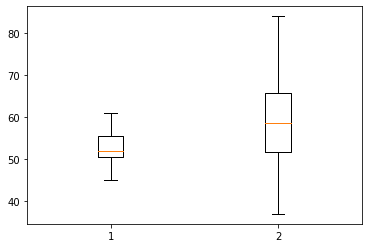

In [33]:
plt.boxplot(data)

In [36]:
stats.shapiro(data.전)

ShapiroResult(statistic=0.9670043587684631, pvalue=0.6907904148101807)

In [37]:
stats.shapiro(data.후)

ShapiroResult(statistic=0.9786623120307922, pvalue=0.9156785011291504)

In [38]:
diff = data.전 - data.후
diff

0     18
1    -11
2    -13
3      2
4    -25
5      8
6     -5
7     -3
8    -19
9    -18
10    -6
11    -8
12     3
13    13
14    -2
15    -6
16   -16
17   -16
18    -2
19    -2
dtype: int64

In [39]:
stats.ttest_1samp(data.전 - data.후, 0)
# 귀무가설 기각

Ttest_1sampResult(statistic=-2.204154108716127, pvalue=0.04004419061842953)

In [40]:
# 독립된 두 집단 평균 비교
# 독립성
# 정규성
# 등분산성
data = pd.read_csv('./data/ch11_training_ind.csv')

In [41]:
data.describe()

,A,B
count,20.000000,20.000000
mean,48.750000,52.050000
std,6.711145,5.020746
min,37.000000,41.000000
25%,44.750000,49.000000
50%,48.500000,52.000000
75%,53.000000,54.250000
max,64.000000,64.000000


In [42]:
# 정규성검정
stats.shapiro(data.A)

ShapiroResult(statistic=0.9685941338539124, pvalue=0.7249506711959839)

In [43]:
stats.shapiro(data.B)

ShapiroResult(statistic=0.9730017781257629, pvalue=0.8165717720985413)

In [44]:
# 등분산성 검정
# 귀무가설 : 분산이 같다
stats.levene(data.A, data.B)

LeveneResult(statistic=2.061573118077718, pvalue=0.15923550057222613)

In [45]:
# 독립표본 t검정
# equal_var = False : 웰치 방법
stats.ttest_ind(data.A, data.B, equal_var = True)

Ttest_indResult(statistic=-1.7608157246524712, pvalue=0.08631600572195147)

In [46]:
stats.ttest_ind(data.A, data.B, equal_var = False)

Ttest_indResult(statistic=-1.760815724652471, pvalue=0.08695731107259361)

In [47]:
# 정규성 만족하지 않는 경우
# 대응표본 ttest 윌콕슨 stats.wilcoxon(전, 후)
# 독립표본 ttest 맨휘트니 U검정 stats.manwhitneyu(A, B, alternative = 'two-sided')

In [48]:
stats.wilcoxon(diff)

WilcoxonResult(statistic=49.5, pvalue=0.03623390197753906)

In [49]:
stats.mannwhitneyu(data.A, data.B, alternative='two-sided')

MannwhitneyuResult(statistic=130.0, pvalue=0.05948611166127324)

In [51]:
# 범주형 데이터에 대하여 : 카이제곱 분포 근거
# 1. 적합도 검정 : 한 표본데이터가 어떤 분포를 하는지?
# 2. 동질성 검정 : 두 범주형 데이터가 동일한 분포를 하는지?
# 3. 독립성 검정 : 두 범주형 데이터가 서로 관련성이 있는지?
# 카이제곱 통계량 = (관측값 - 기대값)^2 / 기대값

In [54]:
data = pd.read_csv('./data/ch11_ad.csv')
data.head()

,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [55]:
# 교차표 작성
cross = pd.crosstab(data.광고, data.구입)
cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [57]:
# 카이제곱 검정
# 두 범주형 변수가 서로 독립적인지 검정
# 귀무가설 : 독립
stat, p, df, exp_tap = stats.chi2_contingency(cross, correction=False)
# 통계량, p-value, 자유도, 기대값
stat, p, df, exp_tap

(3.75,
 0.052807511416113395,
 1,
 array([[360.,  40.],
        [540.,  60.]]))